In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numba import jit
from numba import cuda
import numba
import time
import multiprocessing as mp
import matplotlib.font_manager as font_manager
import sys
from tqdm import tqdm
import scipy.io as scio

In [3]:
def generated_noraml_node_removing_ratio(gmv_y = 717.402647, gmv_e = 602.625714, y_mu = 0.001, sd = 0.003):
    gmv_diff = (gmv_y - gmv_e)/gmv_y
    node_removed_limit = 0.00495
    y_mu = y_mu
    e_mu =  y_mu*(1-gmv_diff)
    sd = sd
    trails = 30
    y_removed_ratio = []
    e_removed_ratio = []
    y, e = 1,1
    # print(np.random.normal(y_mu, sigma, 15))
    for i in range(trails):
      # print(np.random.normal(y_mu, sigma, 1))
      while y > node_removed_limit or y in y_removed_ratio or y<0 :
        y = np.random.normal(y_mu, sd, 1)[0]
#         print(y)
      while e > node_removed_limit or e in e_removed_ratio or e<0 :
        e = np.random.normal(e_mu, sd, 1)[0]
#       print(y, e)
      y_removed_ratio.append(y)
      e_removed_ratio.append(e)
    return y_removed_ratio,e_removed_ratio

def generated_normal_conn_ration(int_y = 1.1364, int_e = 0.8263, y_int_mu = 1, sd = 0.1)

    int_diff = (int_y-int_e)/int_y
    y_int_mu = y_int_mu
    e_int_mu =  y_int_mu*(1-int_diff)
    sd = sd
    trails = 30
    y_conn_difference = []
    e_conn_difference = []
    yint, eint = 10,10
    for i in range(trails):
      # print(np.random.normal(y_mu, sigma, 1))
      while yint > 1 or yint in y_conn_difference or yint < 0.6 :
        yint = np.random.normal(y_int_mu, sigma, 1)[0]
      while eint > 1 or eint in e_conn_difference or eint < 0.6 :
        eint = np.random.normal(e_int_mu, sigma, 1)[0]
      print(yint, eint)
      y_conn_difference.append(yint)
      e_conn_difference.append(eint)
    return y_conn_difference,e_conn_difference

SyntaxError: expected ':' (1502211893.py, line 24)

In [23]:
y_mu = 0.001
sd = 0.003
gmv_y = 717.402647
gmv_e = 502.625714
gmv_diff = (gmv_y - gmv_e)/gmv_y
e_mu =  y_mu*(1-gmv_diff)


In [92]:
gmv_diff

0.29938129430960964

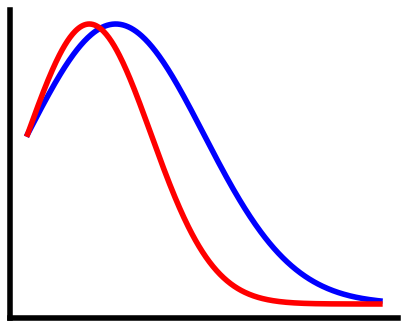

In [89]:
y_xs= np.linspace(0,0.004,400)
# print(xs)
y_ys= 1/(sd * np.sqrt(2 * np.pi)) *\
               np.exp( - (y_xs - y_mu)**2 / (2 * y_mu**2))

e_xs= np.linspace(0,0.004,400)
# print(xs)
e_ys= 1/(sd * np.sqrt(2 * np.pi)) *\
               np.exp( - (e_xs - e_mu)**2 / (2 * e_mu**2))
# print(ys)
fig, ax = plt.subplots(figsize=(5, 4))
ax.plot(y_xs, y_ys, label = 'Young',  linestyle='-', color = 'blue', linewidth= 4)
ax.plot(e_xs, e_ys, label = 'Elderly',linestyle='-', color = 'red', linewidth = 4)
# plt.title("Smooth Spline Curve")
# plt.xlabel("Node Remove",fontname = 'Arial', fontsize= 18)
# plt.ylabel("# of Node Remove",fontname = 'Arial',fontsize=18)
# plt.axis('off')
# plt.xticks(fontsize= 14)
# plt.yticks(fontsize= 14)
plt.gca().set_xticks([])
plt.xticks([])
plt.yticks([])
ax.set_xticks([])
ax.set_yticks([])
bwith = 4
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_linewidth(bwith)
ax.spines['left'].set_linewidth(bwith)
font_prop = font_manager.FontProperties(size = 14, family = 'Arial')
# plt.legend(prop = font_prop)
# plt.grid()
plt.savefig("noraml_node_diff2.png", bbox_inches='tight', pad_inches= 0, dpi = 500)
plt.show()

In [5]:
def generated_normal_conn_ration(int_y = 1.1364, int_e = 0.8263, y_int_mu = 1, sd = 0.1):

    int_diff = (int_y-int_e)/int_y
    y_int_mu = y_int_mu
    e_int_mu =  y_int_mu*(1-int_diff)
    sd = sd
    trails = 30
    y_conn_difference = []
    e_conn_difference = []
    yint, eint = 10,10
    for i in range(trails):
      # print(np.random.normal(y_mu, sigma, 1))
      while yint > 1 or yint in y_conn_difference or yint < 0.6 :
        yint = np.random.normal(y_int_mu, sd, 1)[0]
      while eint > 1 or eint in e_conn_difference or eint < 0.6 :
        eint = np.random.normal(e_int_mu, sd, 1)[0]
      print(yint, eint)
      y_conn_difference.append(yint)
      e_conn_difference.append(eint)
    return y_conn_difference,e_conn_difference

In [6]:
y_conn_difference,e_conn_difference = generated_normal_conn_ration()

0.8220313256488629 0.6729839483799094
0.9778137326232534 0.7112323740000829
0.9477493127470795 0.6540224833408818
0.7701712217478163 0.8112694440395563
0.9045967943158739 0.699759567383471
0.9561136781356717 0.8222981531965972
0.6730848689141848 0.6844219494353705
0.981497004112229 0.8439267161629849
0.8923282843237125 0.6478169782617698
0.8949975818702854 0.851717417192171
0.9354119779579952 0.798361506654015
0.9684038559733026 0.8615400864187777
0.9080161025599867 0.7723999468498384
0.7611198460835669 0.8139244966264706
0.8705420312651976 0.6338623358014319
0.9305004287575993 0.8070616426468594
0.9363279932464056 0.7403970898094142
0.9730728087607708 0.9705601353855452
0.9557453228362864 0.6837154819852321
0.9763191588087378 0.7395503170819735
0.8182454212056789 0.8029904266935238
0.9469881610279012 0.7058048061622857
0.9390119443510457 0.742164083392802
0.9341051241935213 0.8023631801440375
0.9566496691320256 0.7598044851561512
0.9662466665538617 0.8648241124134033
0.841771475286330

In [10]:
print(y_conn_difference)
print(e_conn_difference)
Subj = ['Young']*30+['Elderly']*30
int_difference = y_conn_difference + e_conn_difference
# int_leftconn = [1000000-int(i) for i in np.array(y_conn_difference + e_conn_difference)*1000000]
int_diff_dict = {}
int_diff_dict['Group'] = Subj
int_diff_dict['int_sigma_diff'] = int_difference
int_diff_dict['Connections'] = [int(i*1000000) for i in int_difference]
int_diff_df = pd.DataFrame(int_diff_dict)
int_diff_df.to_csv('int_diff_df.csv')

[0.8220313256488629, 0.9778137326232534, 0.9477493127470795, 0.7701712217478163, 0.9045967943158739, 0.9561136781356717, 0.6730848689141848, 0.981497004112229, 0.8923282843237125, 0.8949975818702854, 0.9354119779579952, 0.9684038559733026, 0.9080161025599867, 0.7611198460835669, 0.8705420312651976, 0.9305004287575993, 0.9363279932464056, 0.9730728087607708, 0.9557453228362864, 0.9763191588087378, 0.8182454212056789, 0.9469881610279012, 0.9390119443510457, 0.9341051241935213, 0.9566496691320256, 0.9662466665538617, 0.8417714752863306, 0.9115731502555277, 0.9186966044801805, 0.7827519912421568]
[0.6729839483799094, 0.7112323740000829, 0.6540224833408818, 0.8112694440395563, 0.699759567383471, 0.8222981531965972, 0.6844219494353705, 0.8439267161629849, 0.6478169782617698, 0.851717417192171, 0.798361506654015, 0.8615400864187777, 0.7723999468498384, 0.8139244966264706, 0.6338623358014319, 0.8070616426468594, 0.7403970898094142, 0.9705601353855452, 0.6837154819852321, 0.7395503170819735, 0.

In [60]:
int_y = 1.1364
int_e = 0.8263
y_int_mu = 1
sd = 0.1
int_diff = (int_y-int_e)/int_y
e_int_mu =  y_int_mu*(1-int_diff)

In [91]:
int_diff

0.27287926786342837

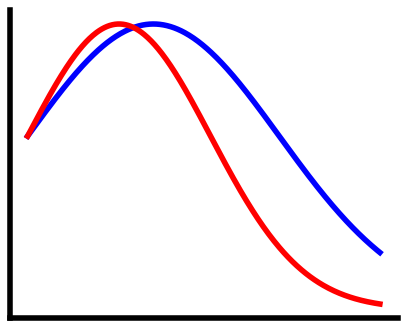

In [90]:

y_xs2= np.linspace(0,2.8,400)
# print(xs)
y_ys2= 1/(sd * np.sqrt(2 * np.pi)) *\
               np.exp( - (y_xs2 - y_int_mu)**2 / (2 * y_int_mu**2))

e_xs2= np.linspace(0,2.8,400)
# print(xs)
e_ys2= 1/(sd * np.sqrt(2 * np.pi)) *\
               np.exp( - (e_xs2 - e_int_mu)**2 / (2 * e_int_mu**2))
# print(ys)
fig, ax = plt.subplots(figsize=(5, 4))
ax.plot(y_xs2, y_ys2, label = 'Young',  linestyle='-', color = 'blue', linewidth= 4)
ax.plot(e_xs2, e_ys2, label = 'Elderly',linestyle='-', color = 'red', linewidth = 4)
# plt.title("Smooth Spline Curve")
# plt.xlabel("Node difference")
# plt.ylabel("Y")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_linewidth(bwith)
ax.spines['left'].set_linewidth(bwith)
font_prop = font_manager.FontProperties(size = 14, family = 'Arial')
# plt.legend(prop = font_prop)
# plt.grid()
plt.gca().set_xticks([])
plt.xticks([])
plt.yticks([])
ax.set_xticks([])
ax.set_yticks([])

plt.savefig("noraml_conn_diff2.png",bbox_inches='tight', pad_inches=0, dpi=300)
# plt.show()

11.510923462299555